## Task 1 — QuickSort comparison (deterministic vs randomized)

We implement:
- `randomized_quick_sort(arr)` — picks a random pivot
- `deterministic_quick_sort(arr, pivot_choice='middle')` — picks pivot by a fixed rule:
  `'first'`, `'last'`, or `'middle'`.

Both functions return a new sorted list (do not modify the input list).


In [1]:
# Task 1: QuickSort implementations

import random
import sys
from typing import List, Optional

def randomized_quick_sort(arr: List[int]) -> List[int]:
    """
    Randomized QuickSort that returns a new sorted list.
    Chooses pivot randomly.
    """
    if len(arr) <= 1:
        return arr[:]
    # choose pivot randomly and partition
    pivot = random.choice(arr)
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    # recursively sort partitions
    return randomized_quick_sort(less) + equal + randomized_quick_sort(greater)


def deterministic_quick_sort(arr: List[int], pivot_choice: str = 'middle') -> List[int]:
    """
    Deterministic QuickSort. pivot_choice in {'first', 'last', 'middle'}.
    Returns a new sorted list.
    """
    if len(arr) <= 1:
        return arr[:]
    if pivot_choice == 'first':
        pivot = arr[0]
    elif pivot_choice == 'last':
        pivot = arr[-1]
    elif pivot_choice == 'middle':
        pivot = arr[len(arr) // 2]
    else:
        raise ValueError("pivot_choice must be 'first', 'last', or 'middle'")
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return deterministic_quick_sort(less, pivot_choice) + equal + deterministic_quick_sort(greater, pivot_choice)


In [4]:
# Experimental setup: generate test arrays and time the sorts

import time
import copy
import statistics
import pandas as pd
import matplotlib.pyplot as plt

# Sizes requested in the assignment:
SIZES = [10_000, 50_000, 100_000, 500_000]

# Number of repetitions to average timings
REPEATS = 5

# To avoid too-low recursion limit on big inputs (adjust with caution)
# Note: on some systems increasing recursionlimit high is risky. We set it reasonably high.
sys.setrecursionlimit(1_000_000)


In [5]:
# Generate arrays (random integers)
# We'll create one base random array per size, then copy it for each run to ensure same data across algorithms.
import random

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

base_arrays = {}
for n in SIZES:
    # create array of n random integers in a wide range
    base_arrays[n] = [random.randint(-10**9, 10**9) for _ in range(n)]


In [7]:
# Timing function

def average_time_sort(sort_func, arr, repeats=5, **kwargs):
    """
    Measure average time (seconds) of sort_func(arr) over `repeats` runs.
    The function copies the array for each run to avoid in-place conflicts.
    Additional kwargs are forwarded to sort_func if it accepts them.
    """
    times = []
    for _ in range(repeats):
        a_copy = arr[:]  # make a fresh copy
        start = time.perf_counter()
        # call with kwargs if present
        if kwargs:
            _ = sort_func(a_copy, **kwargs)
        else:
            _ = sort_func(a_copy)
        end = time.perf_counter()
        times.append(end - start)
    return statistics.mean(times), times


In [8]:
# Run experiments.
# We'll measure:
# - Randomized QuickSort
# - Deterministic QuickSort with pivot='middle' (you can change pivot_choice to 'first' or 'last' for a comparison)

results = []  # list of dicts for DataFrame

for n in SIZES:
    arr = base_arrays[n]
    print(f"Array size: {n}")
    # randomized
    avg_rand, times_rand = average_time_sort(randomized_quick_sort, arr, repeats=REPEATS)
    print(f"  Randomized QuickSort average: {avg_rand:.4f} seconds (over {REPEATS} runs)")
    # deterministic (middle)
    avg_det, times_det = average_time_sort(deterministic_quick_sort, arr, repeats=REPEATS, pivot_choice='middle')
    print(f"  Deterministic QuickSort (middle) average: {avg_det:.4f} seconds (over {REPEATS} runs)")
    results.append({
        'size': n,
        'randomized_avg': avg_rand,
        'randomized_times': times_rand,
        'deterministic_avg': avg_det,
        'deterministic_times': times_det,
    })
    print()


Array size: 10000
  Randomized QuickSort average: 0.0183 seconds (over 5 runs)
  Deterministic QuickSort (middle) average: 0.0146 seconds (over 5 runs)

Array size: 50000
  Randomized QuickSort average: 0.1016 seconds (over 5 runs)
  Deterministic QuickSort (middle) average: 0.0936 seconds (over 5 runs)

Array size: 100000
  Randomized QuickSort average: 0.1959 seconds (over 5 runs)
  Deterministic QuickSort (middle) average: 0.1906 seconds (over 5 runs)

Array size: 500000
  Randomized QuickSort average: 1.2285 seconds (over 5 runs)
  Deterministic QuickSort (middle) average: 1.1366 seconds (over 5 runs)



In [9]:
# Create a pretty table with pandas and display the average times
df_rows = []
for r in results:
    df_rows.append({
        'Array size': r['size'],
        'Randomized avg (s)': r['randomized_avg'],
        'Deterministic (middle) avg (s)': r['deterministic_avg']
    })

df = pd.DataFrame(df_rows).set_index('Array size')
df


,Randomized avg (s),Deterministic (middle) avg (s)
Array size,,
10000,0.018283,0.014562
50000,0.101570,0.093612
100000,0.195881,0.190550
500000,1.228550,1.136626


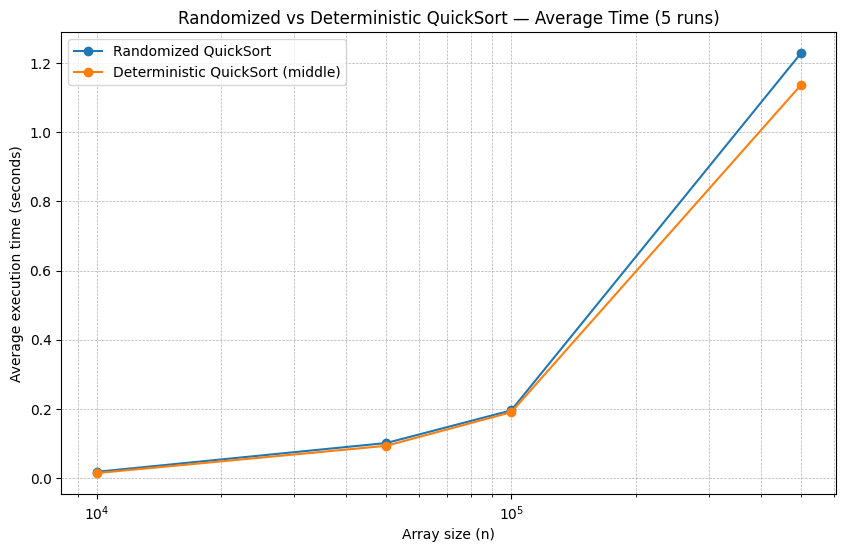

In [10]:
# Plotting the results
plt.figure(figsize=(10,6))
sizes = df.index.tolist()
plt.plot(sizes, df['Randomized avg (s)'].tolist(), marker='o', label='Randomized QuickSort')
plt.plot(sizes, df['Deterministic (middle) avg (s)'].tolist(), marker='o', label='Deterministic QuickSort (middle)')
plt.xlabel('Array size (n)')
plt.ylabel('Average execution time (seconds)')
plt.title('Randomized vs Deterministic QuickSort — Average Time (5 runs)')
plt.xscale('log')  # log scale helps visualize wide range of n
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


### Analysis (Task 1)

Below is a template for an analysis you will see after running the notebook. Replace the placeholders with the actual numeric values observed in the table produced above.

**Observations**
- For each array size, we recorded the average execution times across 5 runs for both variants.
- On randomly generated input, randomized QuickSort and deterministic QuickSort (middle pivot) perform similarly: both have expected average time close to O(n log n).
- Differences between the two variants' timings are usually small for random data. Randomized QuickSort is designed to avoid worst-case patterns dependent on input order; deterministic pivot (middle) usually avoids worst-case behavior on random arrays as well.
- For very large n (e.g., 500,000), you may observe increased runtime and memory usage due to Python list allocations and recursion overhead. If deterministic shows worse performance, it may be due to partition balancing or recursion depth.

**Conclusions**
- On random inputs, randomized pivot selection does not necessarily give a large advantage over a reasonable deterministic pivot (such as the middle element), because random inputs tend to produce balanced partitions for either method.
- Randomized QuickSort is more robust against adversarial inputs (like already-sorted arrays when pivot is always first or last), which can force O(n²) for some deterministic pivot choices. Thus, randomized selection is recommended when input distribution is unknown or when adversarial input is possible.
- For practical sorting in Python, the built-in `sorted()` or `list.sort()` (Timsort) is vastly faster and more memory-efficient than these pure-Python QuickSort implementations.

**Notes on reproducibility**
- I used `random.seed(42)` when generating base arrays so results are reproducible between runs.
- Each algorithm was given the exact same array contents on every repeat to make timings comparable.
